# QA-system
 

In [ ]:
!pip install numpy scipy librosa unidecode inflect librosa transformers
!pip install deeppavlov
!python -m deeppavlov install squad_ru_rubert


# Pre-downloading the BERT for Russian language

!wget https://www.dropbox.com/s/7za1o6vaffbdlcg/rubert_cased_L-12_H-768_A-12_v1.tar.gz -nc
!wget https://www.dropbox.com/s/ns8280pd9t9n9dc/squad_model_ru_rubert.tar.gz -nc

!mkdir -p /root/.deeppavlov/downloads/bert_models/
!mkdir -p /root/.deeppavlov/models/

!tar -xzvf rubert_cased_L-12_H-768_A-12_v1.tar.gz -C /root/.deeppavlov/downloads/bert_models
!tar -xzvf squad_model_ru_rubert.tar.gz -C /root/.deeppavlov/models




from deeppavlov import build_model, configs

# Конфигурационный файл написать в json формате

In [ ]:
model_ru = build_model(configs.squad.squad_ru_rubert, download=False)


text = """Первая многоразовая ступень ракеты-носителя Falcon 9 успешно отделилась через две с половиной минуты после старта и автоматически приземлилась на плавучую платформу Of Course I Still Love You у берегов Флориды. Через 12 минут после запуска космический корабль Crew Dragon вышел на расчетную орбиту и отделился от второй ступени ракеты.

Сближение корабля Crew Dragon с Международной космической станцией запланировано на 31 мая. К стыковочному адаптеру на узловом модуле «Гармония» американского сегмента МКС Crew Dragon должен причалить в ручном или, при необходимости, в автоматическом режиме. Эта процедура запланирована на 10:29 по времени Восточного побережья США (17:29 по московскому времени).

В испытательном полете DM2 астронавт Херли является командиром космического корабля (spacecraft commander), а его напарник Бенкен — командир по операциям стыковки и расстыковки (joint operations commander). Фактически это означает, что именно Херли управляет Crew Dragon в полете к МКС, к которой они должны пристыковаться в течение суток после старта. Херли и Бенкен также будут выполнять необходимые для сертификации НАСА проверки систем корабля в полете.

Во время полета Херли и Бенкен провели небольшую экскурсию по Crew Dragon."""



In [ ]:
model_ru([text], ['Когда отделилась первая ступень?'])[:2]

[['через две с половиной минуты после старта'], [72]]

In [ ]:
model_ru([text], ['На какую дату запланирована стыковка?'])[:2]

[['на 31 мая'], [418]]

In [ ]:
model_ru([text], ['Кто участвует в полете?'])[:2]

[['астронавт Херли'], [729]]

In [ ]:
model_ru([text], ['Кто участвует в полете кроме астронавта Херли?'])[:2]

[['Бенкен'], [1063]]

In [ ]:
model_ru([text], ['Какая ступень приземлилась на плавучую платформу Of Course I Still Love You?'])[:2]

[['Первая многоразовая ступень ракеты-носителя Falcon 9'], [0]]

In [ ]:
!pip install -q torchaudio omegaconf

In [ ]:
import numpy as np
from scipy.io.wavfile import write

import torch
from pprint import pprint
from omegaconf import OmegaConf
from IPython.display import Audio, display



torch.hub.download_url_to_file('https://raw.githubusercontent.com/snakers4/silero-models/master/models.yml',
                               'latest_silero_models.yml',
                               progress=False)
models = OmegaConf.load('latest_silero_models.yml')

# see latest avaiable models
available_languages = list(models.tts_models.keys())
print(f'Available languages {available_languages}')

for lang in available_languages:
    speakers = list(models.tts_models.get(lang).keys())
    print(f'Available speakers for {lang}: {speakers}')

language = 'ru'
speaker = 'kseniya_16khz'
device = torch.device('cpu')
model, symbols, sample_rate, example_text, apply_tts = torch.hub.load(repo_or_dir='snakers4/silero-models',
                                                                      model='silero_tts',
                                                                      language=language,
                                                                      speaker=speaker)
model = model.to(device)  # gpu or cpu


audio = apply_tts(texts=[example_text],
                  model=model,
                  sample_rate=sample_rate,
                  symbols=symbols,
                  device=device)

print(example_text)
display(Audio(audio[0], rate=sample_rate))

Available languages ['ru', 'en', 'de', 'es', 'fr', 'ba', 'xal', 'tt', 'uz', 'multi']
Available speakers for ru: ['aidar_v2', 'aidar_8khz', 'aidar_16khz', 'baya_v2', 'baya_8khz', 'baya_16khz', 'irina_v2', 'irina_8khz', 'irina_16khz', 'kseniya_v2', 'kseniya_8khz', 'kseniya_16khz', 'natasha_v2', 'natasha_8khz', 'natasha_16khz', 'ruslan_v2', 'ruslan_8khz', 'ruslan_16khz']
Available speakers for en: ['lj_v2', 'lj_8khz', 'lj_16khz']
Available speakers for de: ['thorsten_v2', 'thorsten_8khz', 'thorsten_16khz']
Available speakers for es: ['tux_v2', 'tux_8khz', 'tux_16khz']
Available speakers for fr: ['gilles_v2', 'gilles_8khz', 'gilles_16khz']
Available speakers for ba: ['aigul_v2']
Available speakers for xal: ['erdni_v2']
Available speakers for tt: ['dilyara_v2']
Available speakers for uz: ['dilnavoz_v2']
Available speakers for multi: ['multi_v2']


Downloading: "https://github.com/snakers4/silero-models/archive/master.zip" to /root/.cache/torch/hub/master.zip


  0%|          | 0.00/136M [00:00<?, ?B/s]

В н+едрах т+ундры в+ыдры в г+етрах т+ырят в в+ёдра +ядра к+едров.


In [ ]:
device

device(type='cpu')

In [ ]:
answer = model_ru([text], ['Когда отделилась первая ступень?'])[0]
print(answer)
audio = apply_tts(texts=answer,
                  model=model,
                  sample_rate=sample_rate,
                  symbols=symbols,
                  device=device)

display(Audio(audio[0], rate=sample_rate))

['через две с половиной минуты после старта']


# Neuron style transfer

In [ ]:
!pip install numpy tensorflow==2.4.1 tensorflow-hub==0.11.0 pillow matplotlib

In [ ]:
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import PIL
from PIL import Image
import numpy as np
import tensorflow_hub as hub

In [ ]:
tf.__version__

'2.4.1'

In [ ]:
def tensor_to_image(tensor):
    """Преобразует массив в изображение"""

    tensor = tensor * 255   # преобразование, обратное стандартизации
    tensor = np.array(tensor, dtype=np.uint8)
    assert tensor.shape[0] == 1
    tensor = tensor[0]      # избавляемся от введенного ранее дополнительного измерения
    return PIL.Image.fromarray(tensor)


def load_img(path_to_img):
    """Загружает файл, выполняет преобразования и возвращает массив,
    содержащий элементы изображения и ограниченный размерами max_dim_val"""

    max_dim_val = 512
    img = tf.io.read_file(path_to_img)  # загрузка файла
    img = tf.image.decode_image(img, channels=3)    # преобразование в тип uint8
    img = tf.image.convert_image_dtype(img, tf.float32)     # нормализация(стандартизация) признаков
    shape = tf.cast(tf.shape(img)[:-1], tf.float32)     # приведем массив к новому типу
    new_shape = tf.cast(shape * (max_dim_val / max(shape)), tf.int32)
    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]    # добавим еще одно измерение массиву, что необходимо для обработки
    return img



In [ ]:
# Рассмотреть архитектуру, выполнить загрузку локальных файлов
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

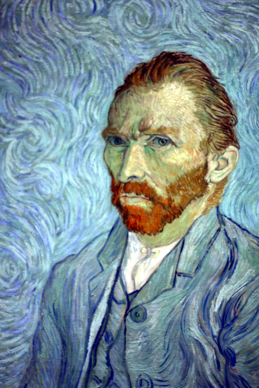

In [ ]:
im = Image.open('vanGog.jpg')
size = im.size
im = im.resize((size[0] // 10, size[1] // 10))
im

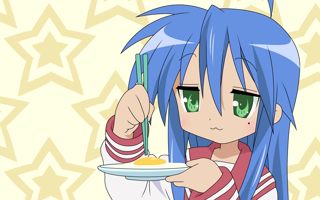

In [ ]:
im2 = Image.open('image.jpg')
size = im2.size
im2 = im2.resize((size[0] // 6, size[1] // 6))
im2

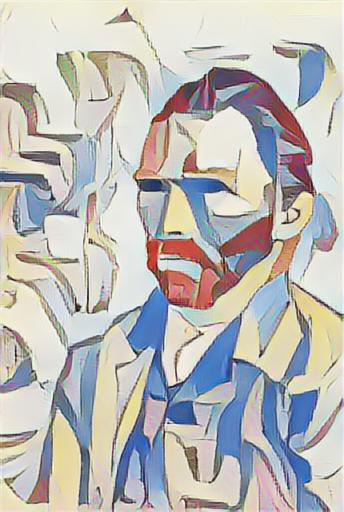

In [ ]:
content_image = load_img('vanGog.jpg')      # преобразовать изображение
style_image = load_img('image.jpg')

stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]

fname = 'res.jpg'
tensor_to_image(stylized_image).save(fname)
im = Image.open(fname)
im

# Окрашинвание черно-белых изображений

In [8]:
!pip install cv

In [3]:
from google.colab import drive
# drive.mount('/content/gdrive/My Drive/wget')
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls /content/drive/MyDrive/wget/black_white_neuron/colorization_models

colorization_deploy_v2.prototxt     pts_in_hull.npy
colorization_release_v2.caffemodel


In [13]:
import cv2
import numpy as np

In [11]:
|'dnn' in dir(cv2)

True

In [22]:
path = r'/content/drive/MyDrive/wget/black_white_neuron/colorization_models/'

def load_model():
  print('Loading model ...')

  prototxt = path + 'colorization_deploy_v2.prototxt'
  model = path + 'colorization_release_v2.caffemodel'
  points = path + 'pts_in_hull.npy'

  net = cv2.dnn.readNetFromCaffe(prototxt, model)
  pts = np.load(points)

  class8 = net.getLayerId('class8_ab')
  conv8 = net.getLayerId('conv8_313_rh')
  pts = pts.transpose().reshape(2, 313, 1, 1)
  net.getLayer(class8).blobs = [pts.astype('float32')]
  net.getLayer(conv8).blobs = [np.full([1, 313], 2.606, dtype='float32')]
  return net

In [27]:
def colorize_image(net, image_in, image_out):
  image = cv2.imread(image_in)
  height, width, channels = image.shape

  scaled = image.astype('float32') / 255.0
  lab = cv2.cvtColor(scaled, cv2.COLOR_RGB2LAB)

  resized = cv2.resize(lab, (224, 224))
  L = cv2.split(resized)[0]
  L -= 50

  net.setInput(cv2.dnn.blobFromImage(L))
  ab = net.forward()[0, :, :, :].transpose((1, 2, 0))

  L = cv2.split(lab)[0]
  ab = cv2.resize(ab, (width, height))
  colorized = np.concatenate((L[:, :, np.newaxis], ab), axis=2)

  colorized = cv2.cvtColor(colorized, cv2.COLOR_LAB2RGB)
  colorized = np.clip(colorized, 0,1)
  colorized = (255 * colorized).astype('uint8')

  cv2.imwrite(image_out, cv2.cvtColor(colorized, cv2.COLOR_RGB2BGR))
  print(f'Image {image_out} saved')


In [32]:
net = load_model()
colorize_image(net, '1.jpg', '2.jpg')

Loading model ...
Image 2.jpg saved


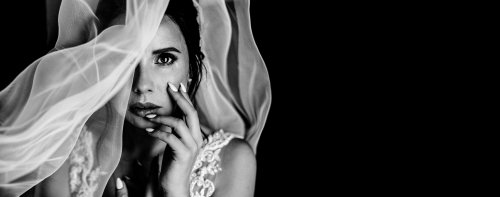

In [26]:
import PIL
from PIL import Image

im = Image.open('1.jpg')
size = im.size
im = im.resize((size[0], size[1]))
im

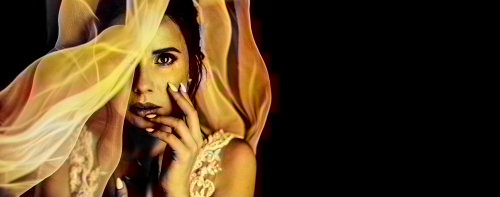

In [33]:
import PIL
from PIL import Image

im = Image.open('2.jpg')
size = im.size
im = im.resize((size[0], size[1]))
im

# Автоматизация НКО

### Определение эмоциональной окраски текста

In [ ]:
!pip install deeppavlov==0.16.0
!pip install tensorflow==1.15.5

In [ ]:
from deeppavlov import build_model, configs

model_sent = build_model(configs.classifiers.rusentiment_elmo_twitter_cnn, download=True)


In [17]:
model_sent(['В Африке воды мало, но она вкусная'])[0]

'positive'

### Аннотирование текста

In [ ]:
!pip install transformers==4.9.2
!pip install sentencepiece==0.1.96

In [12]:
from transformers import MBartTokenizer, MBartForConditionalGeneration
import warnings
warnings.filterwarnings("ignore")

model_name = "IlyaGusev/mbart_ru_sum_gazeta"
tokenizer = MBartTokenizer.from_pretrained(model_name)
model = MBartForConditionalGeneration.from_pretrained(model_name)

In [19]:
article = """Что произошло
Генеральный директор и основной акционер Яндекса Аркадий Волож согласился на дальнейшую блокировку принадлежащих ему акций класса B, говорится в сообщении компании.

Он и его семейный траст не будут продавать или передавать акции до конца 2023 г. Продолжающаяся блокировка внесет ясность в этот вопрос для рынка и обеспечит непрерывность деятельности компании в ближайшие годы.

Аркадий Волож отметил, что гордится достижениями Яндекс на сегодняшний день, отдельно выделив те возможности, которые компания видит впереди. В дополнение к основному бизнесу он отмечает перспективы инвестиций в новые проекты, такие как электронная коммерция, беспилотные авто и облачные технологии. Все это закладывает основу для обеспечения роста в ближайшие годы, раскрывая новые источники стоимости для всех акционеров, отметил глава Яндекса.

Что это значит
Ранее в декабре 2019 г. уже был принят lock-up период по продаже пакета Воложа, но он истекает в конце 2021 г.

Продление соглашения о блокировке является в целом положительным моментом. Оно точно снимает навес потенциального крупного продавца, что позитивно для отношения инвесторов к бумагам компании. Нет рисков, что основной голосующий акционер решит реализовать свой пакет.

В настоящее время семейный траст Аркадия Воложа владеет примерно 30,8 млн акций класса B. Показатель «Votig Power», то есть доля в структуре голосующих акций, составляет 45,3%.

Акции Яндекса в понедельник на Московской бирже торгуются лучше рынка, прибавляя 1 (11:15 МСК).

Подробнее на БКС Экспресс:
https://bcs-express.ru/novosti-i-analitika/arkadii-volozh-prodliaet-lock-up-on-ne-budet-prodavat-aktsii-iandeksa-do-2024"""

In [23]:
inputs = tokenizer(article[:], src_lang="en_XX", padding="max_length", truncation=True, max_length=600, return_tensors="pt")
translated_tokens = model.generate(**inputs, decoder_start_token_id=tokenizer.lang_code_to_id["ro_RO"])



Keyword arguments {'src_lang': 'en_XX'} not recognized.


In [24]:
summary = tokenizer.batch_decode(translated_tokens, skip_special_tokens=True)[0]
print(summary)

Генеральный директор и основной акционер Яндекса Аркадий Волож согласился на дальнейшую блокировку принадлежащих ему акций класса B. Продолжающаяся блокировка внесет ясность в этот вопрос для рынка и обеспечит непрерывность деятельности компании в ближайшие годы.


In [25]:
model_sent([summary])[0]

'neutral'